In [1]:
sawdust <- read.csv("sawdust.csv")

In [2]:
install.packages("plyr")
library(plyr)
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 5)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
plotData <- ddply(sawdust, c("Dose"), summarise,
                  n = length(Milk),
                  Mean = mean(Milk),
                  df = n - 1,
                  alpha = 0.05,
                  t_crit = qt(alpha/2, df = df, lower.tail = FALSE),
                  se = sd(Milk) / sqrt(n),
                  MOE = se * t_crit
)

plotData

Dose,n,Mean,df,alpha,t_crit,se,MOE
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,12,0.3020833,11,0.05,2.200985,0.06049499,0.1331486
4,12,1.2083333,11,0.05,2.200985,0.07895706,0.1737833
6,12,1.6562500,11,0.05,2.200985,0.05132017,0.1129549
8,12,1.3541667,11,0.05,2.200985,0.04824901,0.1061954
10,12,0.9375000,11,0.05,2.200985,0.06794466,0.1495452


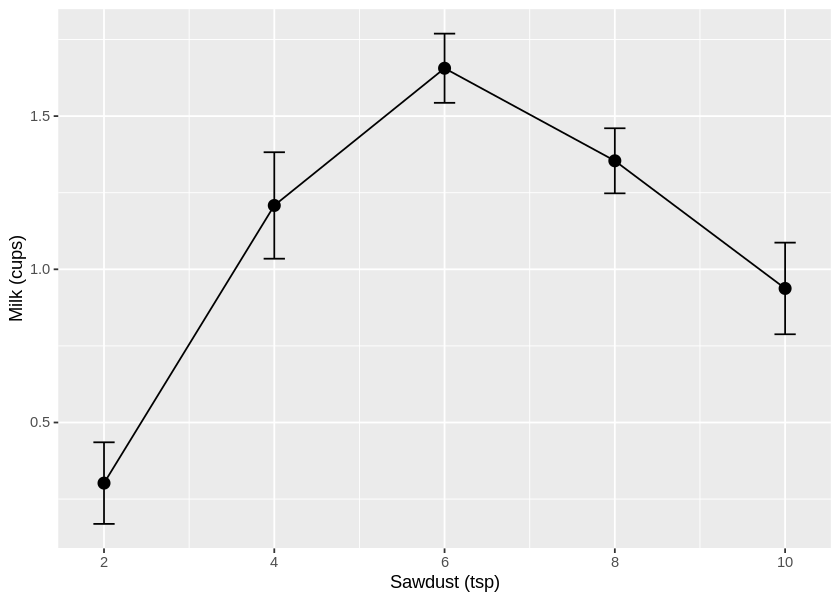

In [4]:
ggplot(plotData, aes(x = Dose, y = Mean)) +
  geom_line() +
  geom_point(size = 3) +
  geom_errorbar(aes(ymin = Mean - MOE,
                    ymax = Mean + MOE),
                width = 0.25) +
  scale_x_continuous(breaks = c(2, 4, 6, 8, 10)) +
  xlab("Sawdust (tsp)") + ylab("Milk (cups)")

In [5]:
is.numeric(sawdust$Dose)

[1] TRUE

In [6]:
sawdust$Dose * 100

[1]  800  600  800 1000  600  600  200  200  800  600  400 1000  400 1000  200
[16] 1000  800  600  400  800  600  400 1000  600 1000 1000  400  800  200 1000
[31]  400  200  200 1000  400  200  800  600  200  600  400  800  800  800  800
[46]  400  200  200 1000  600  400  800  400  600  200  200 1000  400  600 1000

In [7]:
# Factor the dose column
sawdust$Dose <- factor(sawdust$Dose)
levels(sawdust$Dose)

[1] "2"  "4"  "6"  "8"  "10"

In [8]:
is.numeric(sawdust$Dose)

[1] FALSE

In [9]:
sawdust$Dose * 100

Warning message in Ops.factor(sawdust$Dose, 100):
“‘*’ not meaningful for factors”


[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[26] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[51] NA NA NA NA NA NA NA NA NA NA

In [10]:
contrasts(sawdust$Dose) <- contr.poly(levels(sawdust$Dose))

In [11]:
contrasts(sawdust$Dose)

,.L,.Q,.C,^4
2,-6.324555e-01,0.5345225,-3.162278e-01,0.1195229
4,-3.162278e-01,-0.2672612,6.324555e-01,-0.4780914
6,-3.510833e-17,-0.5345225,1.755417e-16,0.7171372
8,3.162278e-01,-0.2672612,-6.324555e-01,-0.4780914
10,6.324555e-01,0.5345225,3.162278e-01,0.1195229


In [12]:
summary(lm(Milk ~ Dose, data = sawdust))


Call:
lm(formula = Milk ~ Dose, data = sawdust)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58333 -0.12240  0.04167  0.14583  0.43750 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.09167    0.02791  39.116  < 2e-16 ***
Dose.L       0.44799    0.06241   7.179 1.92e-09 ***
Dose.Q      -0.90757    0.06241 -14.543  < 2e-16 ***
Dose.C       0.10870    0.06241   1.742   0.0871 .  
Dose^4       0.11081    0.06241   1.776   0.0813 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2162 on 55 degrees of freedom
Multiple R-squared:  0.8304,	Adjusted R-squared:  0.818 
F-statistic: 67.31 on 4 and 55 DF,  p-value: < 2.2e-16


# Creating a Quadratic Model

In [13]:
# Remove the factoring
sawdust$Dose <- as.numeric(as.character(sawdust$Dose))

In [14]:
is.numeric(sawdust$Dose)

[1] TRUE

In [15]:
sawdust$Dose2 <- sawdust$Dose^2
#sawdust

In [16]:
quadMod <- lm(Milk ~ Dose + Dose2, data = sawdust)

In [17]:
summary(quadMod)


Call:
lm(formula = Milk ~ Dose + Dose2, data = sawdust)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56756 -0.19821  0.04821  0.15513  0.48512 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.03125    0.13867  -7.437 5.96e-10 ***
Dose         0.79851    0.05284  15.112  < 2e-16 ***
Dose2       -0.06064    0.00432 -14.037  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.224 on 57 degrees of freedom
Multiple R-squared:  0.8113,	Adjusted R-squared:  0.8047 
F-statistic: 122.5 on 2 and 57 DF,  p-value: < 2.2e-16


# $$\hat{Y} = -1.03 + 0.799 x + (-0.06)x^2 $$

In [18]:
#x <- c(2, 4, 6, 8, 10)
x <- seq(2, 10, by = 0.01)
y <- quadMod$coefficients[1] + quadMod$coefficients[2] * x + quadMod$coefficients[3] * x^2
modPreds <- data.frame(x, y)
#modPreds

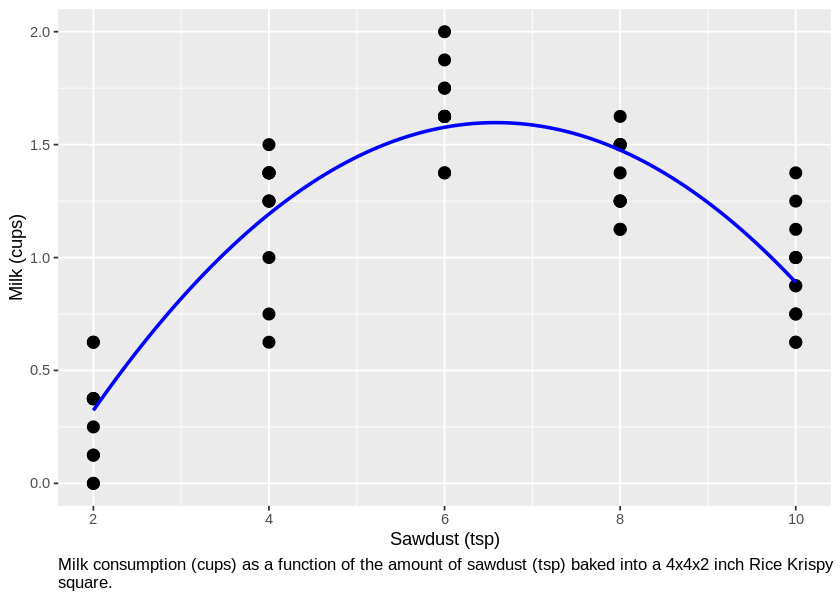

In [24]:
ggplot(sawdust, aes(x = Dose, y = Milk)) +
  geom_point(size = 3) +
  geom_line(data = modPreds, aes(x = x, y = y),
            colour = "blue", linewidth = 1) +
  xlab("Sawdust (tsp)") + ylab("Milk (cups)") +
  labs(caption = "Milk consumption (cups) as a function of the amount of sawdust (tsp) baked into a 4x4x2 inch Rice Krispy\nsquare.") +
  theme(plot.caption = element_text(hjust = 0, size = 10))